<a href="https://colab.research.google.com/github/joaomottin/DataScienceLab/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


###############################################################
#Importação base de dados.                                    #
#O método vai abrir uma combo-box para selecionar um arquivo. #
#O arquivo será carregado na variável uploaded.               #
###############################################################

from google.colab import files

uploaded = files.upload()


Saving amazon_cells_labelled.txt to amazon_cells_labelled.txt


In [ ]:
!pip install -U --force-reinstall --no-cache-dir numpy==2.0.2 scipy==1.16.1 scikit-learn==1.6.1

In [2]:

import pandas as pd
import io


# ##################################################################################################################
#Passar a variável uploaded para read_csv, que recebe dois parâmetros:                                             #
# (i) io.BytesIO -> Simula o caminho do csv utilizando a variável uploaded, que é o primeiro parâmetro de entrada. #
# (ii) sep -> separador utilizado no csv, nesse caso é a tabulação, é osegundo parâmetro de entrada.               #
####################################################################################################################
df = pd.read_csv(io.BytesIO(uploaded['amazon_cells_labelled.txt']),sep = '\t')
#Testar se o dataframe com o arquivo carregado é printado com o cabeçalho corrento, no caso a coluna text e a coluna target.
print(df)

                                                  text  target
0    So there is no way for me to plug it in here i...       0
1                          Good case, Excellent value.       1
2                               Great for the jawbone.       1
3    Tied to charger for conversations lasting more...       0
4                                    The mic is great.       1
..                                                 ...     ...
995  The screen does get smudged easily because it ...       0
996  What a piece of junk.. I lose more calls on th...       0
997                       Item Does Not Match Picture.       0
998  The only thing that disappoint me is the infra...       0
999  You can not answer calls with the unit, never ...       0

[1000 rows x 2 columns]


In [3]:
df.groupby('target').count()

,text
target,
0,500
1,500


In [4]:
df.text.head(2)

,text
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."


In [5]:
# testando se o dataframe consegue separar a coluna texto, exibindo as 5 últimas instâncias.
df['text'].head(5)

,text
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."
2,Great for the jawbone.
3,Tied to charger for conversations lasting more...
4,The mic is great.


In [6]:
# testando se o dataframe consegue separar a coluna target, exibindo as 5 últimas instâncias.
df['target'].tail(5)


,target
995,0
996,0
997,0
998,0
999,0


In [7]:
# testando se o dataframe consegue separar a coluna target, exibindo as 5 primeiras instâncias.
df['target'].head(5)

,target
0,0
1,1
2,1
3,0
4,1


In [8]:
#Agrupamento da base pelo target, para contagem da classe negativa (ex: ham) e positiva (ex:spam)
df.groupby('target').count()

,text
target,
0,500
1,500


In [10]:
#Verificação de tipagem das colunas do dataframe
df.dtypes

,0
text,object
target,int64


In [11]:
############################################
#Verificação do percentual de balancamento:#
#(i) Fazer agrupamento pelo target         #
#(ii) Contar o toal do agrupamento.        #
#(iii) Cálculo da porcentagem.             #
############################################

contagem_classes = df.groupby('target')['target'].count()

total = contagem_classes.sum()

porcentagem_classes = contagem_classes / total *100
print(porcentagem_classes)


target
0    50.0
1    50.0
Name: target, dtype: float64


In [12]:
contagem_classes

,target
target,
0,500
1,500


In [13]:
total

np.int64(1000)

In [14]:
# X representação do feature space (espaço de características)
X = df['text']
# y representação do target (a verdade - a base é supervisionada)
y= df['target']

In [ ]:
y

,target
0,0
1,1
2,1
3,0
4,1
...,...
995,0
996,0
997,0
998,0


In [15]:
X

,text
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."
2,Great for the jawbone.
3,Tied to charger for conversations lasting more...
4,The mic is great.
...,...
995,The screen does get smudged easily because it ...
996,What a piece of junk.. I lose more calls on th...
997,Item Does Not Match Picture.
998,The only thing that disappoint me is the infra...


In [17]:
#Separação da base em treinamento e teste através da técnica % split (train_test_split)
#pip install -U scikit-learn==1.6.1
#!pip install scikit-learn==1.2.2
#!pip install -U --force-reinstall --no-cache-dir numpy==2.0.2 scipy==1.16.1 scikit-learn==1.6.1
import numpy as np
from sklearn.model_selection import train_test_split
# X representação do feature space (espaço de características)
X = df['text']
# y representação do target (a verdade - a base é supervisionada)
y= df['target']
# O método train_test_split recebe de parâmetro:
#(i) X -> Espaço de características
#(ii) y-> target (a verdade ex: se é ou não é spam)
#(iii) test_size -> porcentagem daquilo que será separado para teste, no caso 25% de todas as instâncias (instância é uma linha da base de dados).
#(iv) random_state -> é a seed (semente) para a geração do sorteio das instâncias.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
# O método train_test_split retorna 4 variáveis:
#(i) X_train -> espaço de caracterísricas de treinamento - instâncias sorteadas de treinamento (75% da base)
#(i) X_test -> espaço de caracterísricas de teste - instâncias sorteadas de teste (25% da base)
#(ii) y_train -> target de treinamento -  instâncias sorteadas de treinamento (75% da base)
#(iii)y_test ->  target de teste -  instâncias sorteadas de teste (25% da base)

In [18]:
#Verificação do target, a esqueda está o índice das instâncias sorteadas para o treinamento.
y_train

,target
942,0
962,1
237,1
914,0
301,1
...,...
952,1
643,1
249,1
664,1


In [19]:
#Verificação do target, a esquerda está o índice das instâncias sorteadas para o teste.
y_test

,target
642,0
762,1
909,1
199,0
586,1
...,...
146,0
897,0
705,1
458,1


In [20]:
#Verificação do espaço de características, a esquerda está o índice das instâncias sorteadas para o teste.
X_test

,text
642,Obviously they have a terrible customer servic...
762,Just what I wanted.
909,Seller shipped quickly and much cheaper than t...
199,"useless phone, simply deaf."
586,Battery is holding up well.
...,...
146,What a waste of time!
897,Don't buy this product - It fails!.
705,I love this cable - it allows me to connect an...
458,Very well made and fits my Surefire GX2 perfec...


In [22]:
X_train_indices

Index([942, 962, 237, 914, 301, 347, 549, 386, 448, 640,
       ...
       714, 659, 789, 256, 968, 952, 643, 249, 664, 874],
      dtype='int64', length=750)

In [21]:
# Importando a biblioteca do TF-IDF, que fará o processo de contagem de palavras (bag-of-words)
from sklearn.feature_extraction.text import TfidfVectorizer

# Pegando os índices de treimaneto e teste
X_train_indices = X_train.index  # Índices sorteados para treinamento
X_test_indices = X_test.index    # Índices sorteados para teste

# Localizando o texto através dos índices com iloc
X_train_text = df['text'].iloc[X_train_indices] # Extraindo o texto correspondente aos índices presentes no treinamento
X_test_text = df['text'].iloc[X_test_indices]   # Extraindo o texto correspondente aos índices presentes no teste

# Incializando o TfidfVectorizer com parâmtros default (padrão)
vectorizer = TfidfVectorizer()
#Atributo (no caso de texto)-> Uma nova palavra a ser contada
# No espaço de características (texto) de treimaneto, apenas dar "fit_transform", ou seja a irá ser criado os atributos TF-IDF através do FIT e irá ser feita a contagem de palavras através do Transform.
X_train_tfidf = vectorizer.fit_transform(X_train_text)
# No espaço de características (texto) de treimaneto, apenas dar apenas "transform", não criando nenhum atributo novo, apenas contando os atributos já criandos anteriormente.
X_test_tfidf = vectorizer.transform(X_test_text)




In [23]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6828 stored elements and shape (750, 1556)>

In [24]:
# Importando um classificador
from sklearn.ensemble import RandomForestClassifier

In [25]:
#Criar um classificador RandomForest com hyperparâmtros default
model = RandomForestClassifier()
#Criando efetivamente o modelo de machine learning, que recebe dois parâmetros:
#(i) Espaço de características de treinamento, transformado por tf_idf (contagem de palavras)
#(ii) A verdade (target), supervisionada (previamente anotada na base) da parte de treinamento.
model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [26]:
# O modelo treinado está na variável modelo, aqui estamos passando para o método predict, o espaço de características de teste, transformado por tf_idf
# Importante, o método predict não fornece a probabilidade, ele fornece uma transformação da probabilidade em classe positiva (1) ou classe negativa (0) considerando o limiar de classificação de 50%
# ex: >50% -> 1
# <=50% -> 0

# LINHA QUE FALTAVA: Use o modelo treinado para fazer as previsões nos dados de teste.
y_pred = model.predict(X_test_tfidf)

# Agora sim, crie o DataFrame com os resultados da previsão.
df_aux = pd.DataFrame({'target_previsto': y_pred})

array([[<Axes: title={'center': 'target_previsto'}>]], dtype=object)

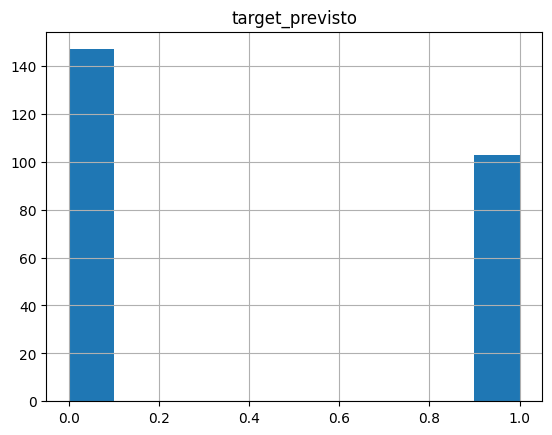

In [27]:
df_aux.hist()

In [28]:
pd.DataFrame(['prob',y_pred])

,0
0,prob
1,"[0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, ..."


In [29]:
#aqui estamos passando para o método predict_proba, o espaço de características de teste, transformado por tf_idf
#O método retorna, para cada instância de teste a probabilidade na forma ex:[0.2,0.8], onde 0.2 é a probilidade da classe negativa (0) ex: não é spam e 0.8 é a probabilidade da classe positiva ex: é spam.
y_proba = model.predict_proba(X_test_tfidf)

In [30]:
y_proba

array([[0.77, 0.23],
       [0.55, 0.45],
       [0.35, 0.65],
       [0.58, 0.42],
       [0.37, 0.63],
       [0.49, 0.51],
       [0.84, 0.16],
       [0.92, 0.08],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.08, 0.92],
       [0.26, 0.74],
       [0.45, 0.55],
       [0.33, 0.67],
       [0.88, 0.12],
       [0.66, 0.34],
       [0.18, 0.82],
       [0.24, 0.76],
       [0.77, 0.23],
       [0.3 , 0.7 ],
       [0.13, 0.87],
       [0.53, 0.47],
       [0.42, 0.58],
       [0.45, 0.55],
       [0.79, 0.21],
       [0.61, 0.39],
       [0.84, 0.16],
       [0.63, 0.37],
       [0.34, 0.66],
       [0.64, 0.36],
       [0.71, 0.29],
       [0.65, 0.35],
       [0.82, 0.18],
       [0.77, 0.23],
       [0.05, 0.95],
       [0.46, 0.54],
       [0.31, 0.69],
       [0.71, 0.29],
       [0.88, 0.12],
       [0.64, 0.36],
       [0.64, 0.36],
       [0.45, 0.55],
       [0.49, 0.51],
       [0.4 , 0.6 ],
       [0.22, 0.78],
       [0.63, 0.37],
       [0.72, 0.28],
       [0.53,

In [31]:

#Isolando apenas a probabilidade da classe positiva (ex: é spam)
y_proba_1 = y_proba[:,1]

In [32]:
# Histograma Azul - populaçao geral (probabilidade de ser spam que é a classe positiva)
y_proba_1

array([0.23, 0.45, 0.65, 0.42, 0.63, 0.51, 0.16, 0.08, 0.55, 0.11, 0.92,
       0.74, 0.55, 0.67, 0.12, 0.34, 0.82, 0.76, 0.23, 0.7 , 0.87, 0.47,
       0.58, 0.55, 0.21, 0.39, 0.16, 0.37, 0.66, 0.36, 0.29, 0.35, 0.18,
       0.23, 0.95, 0.54, 0.69, 0.29, 0.12, 0.36, 0.36, 0.55, 0.51, 0.6 ,
       0.78, 0.37, 0.28, 0.47, 0.81, 0.47, 0.73, 0.32, 0.52, 0.51, 1.  ,
       0.61, 0.46, 0.25, 0.56, 0.19, 0.43, 0.89, 0.16, 0.65, 0.42, 0.58,
       0.5 , 0.44, 0.51, 0.71, 0.6 , 0.81, 0.4 , 1.  , 0.28, 0.92, 0.79,
       0.34, 0.13, 0.1 , 0.24, 0.74, 0.5 , 0.45, 0.33, 0.11, 0.41, 0.98,
       0.06, 0.43, 0.35, 0.23, 0.18, 0.46, 0.27, 0.02, 0.1 , 0.84, 0.53,
       0.63, 0.59, 0.85, 0.23, 0.52, 0.74, 0.11, 0.99, 0.5 , 0.6 , 0.76,
       0.32, 0.54, 0.5 , 0.59, 0.3 , 1.  , 0.32, 0.63, 0.45, 0.37, 0.18,
       0.05, 0.88, 0.1 , 0.03, 0.22, 0.7 , 0.41, 0.55, 0.93, 0.05, 0.19,
       0.55, 0.76, 0.65, 0.58, 0.27, 0.69, 0.78, 0.31, 0.67, 0.99, 0.14,
       0.17, 0.15, 0.68, 0.3 , 0.26, 0.02, 0.17, 0.

In [33]:
pd.DataFrame

pandas.core.frame.DataFrame

In [34]:
df_proba_1 = pd.DataFrame({'probabilidadeSpam':y_proba_1,'targetTeste':y_test})

array([[<Axes: title={'center': 'probabilidadeSpam'}>,
        <Axes: title={'center': 'targetTeste'}>]], dtype=object)

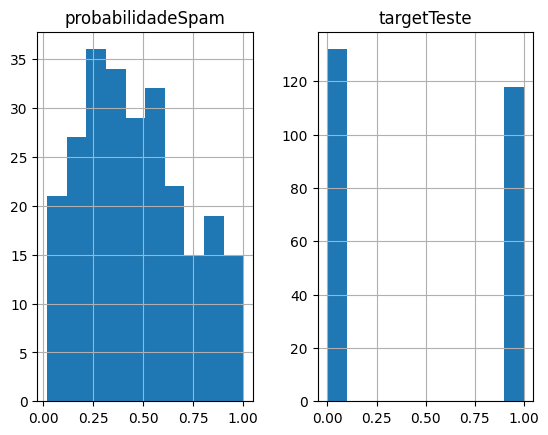

In [35]:
df_proba_1.hist()

In [36]:
df_proba_1.loc[(df_proba_1['probabilidadeSpam']<0.1) & (df_proba_1['targetTeste']==1)].count()/186

,0
probabilidadeSpam,0.0
targetTeste,0.0


In [37]:
#proba_1 = probabilidade de ser spam , apenas instÂancias de teste
df_proba_1_positivos = df_proba_1.loc[df_proba_1['targetTeste']==1]

In [38]:
#Histograma vermelho -probabilidade de ser spam (que é a classe positiva), MAS
#referente apenas a Populaçao com target positivo.
df_proba_1_positivos['probabilidadeSpam'].to_list()

[0.45,
 0.65,
 0.63,
 0.51,
 0.55,
 0.92,
 0.74,
 0.67,
 0.82,
 0.76,
 0.7,
 0.87,
 0.47,
 0.58,
 0.55,
 0.66,
 0.36,
 0.35,
 0.95,
 0.69,
 0.55,
 0.6,
 0.78,
 0.37,
 0.47,
 0.81,
 0.47,
 0.73,
 0.52,
 0.51,
 1.0,
 0.56,
 0.89,
 0.65,
 0.42,
 0.5,
 0.44,
 0.51,
 0.71,
 0.6,
 0.81,
 0.4,
 1.0,
 0.92,
 0.79,
 0.34,
 0.74,
 0.41,
 0.98,
 0.43,
 0.23,
 0.27,
 0.84,
 0.63,
 0.59,
 0.85,
 0.74,
 0.99,
 0.6,
 0.76,
 0.54,
 0.5,
 0.59,
 1.0,
 0.88,
 0.7,
 0.41,
 0.93,
 0.76,
 0.65,
 0.58,
 0.78,
 0.67,
 0.99,
 0.17,
 0.68,
 0.86,
 0.82,
 0.61,
 0.25,
 1.0,
 0.93,
 0.29,
 0.81,
 0.61,
 0.2,
 0.97,
 0.39,
 0.85,
 0.76,
 0.48,
 0.41,
 0.47,
 1.0,
 0.71,
 0.81,
 0.63,
 0.92,
 0.37,
 0.41,
 0.32,
 0.86,
 0.27,
 0.84,
 0.4,
 0.62,
 0.44,
 0.83,
 0.82,
 0.23,
 0.9,
 0.7,
 0.57,
 0.42,
 0.34,
 0.22,
 0.69,
 0.82]

array([[<Axes: title={'center': '0'}>]], dtype=object)

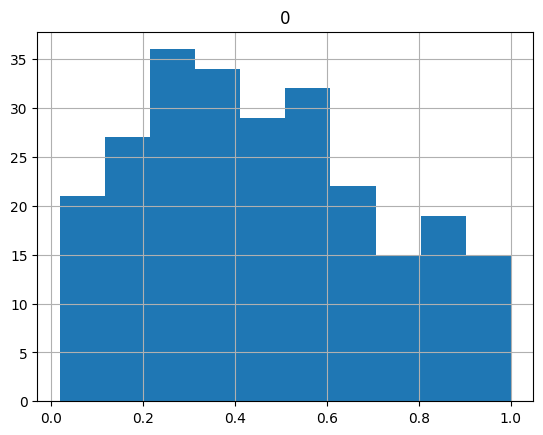

In [39]:
pd.DataFrame(y_proba_1).hist(bins =10)

In [40]:
df_filtro_1 = pd.DataFrame({'prob_1':y_proba_1,'y_test':y_test})

In [41]:
df_filtro_1_filtrado =  df_filtro_1.loc[df_filtro_1['y_test']==1]

<Axes: >

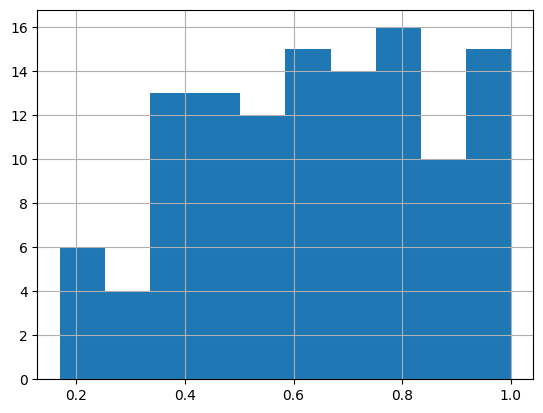

In [42]:
df_filtro_1_filtrado['prob_1'].hist(bins=10)

In [43]:
df_filtro_1_filtrado.count()

,0
prob_1,118
y_test,118


In [44]:
df_eval = pd.DataFrame({'probabilidade_pos':y_proba_1,'target_teste':y_test})

In [45]:
df_eval_filtrado = df_eval[df_eval['target_teste']==1]

In [46]:
df_eval_filtrado.count()

,0
probabilidade_pos,118
target_teste,118


<Axes: >

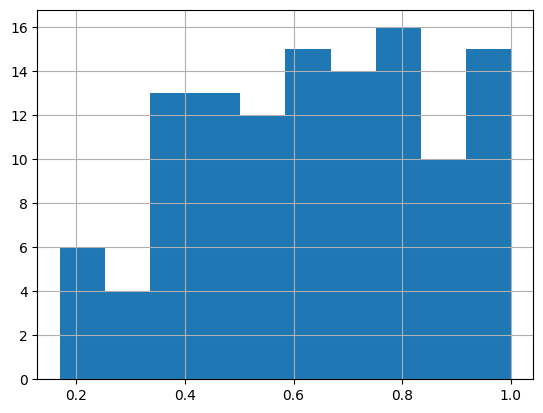

In [47]:
df_eval_filtrado['probabilidade_pos'].hist(bins = 10)

In [48]:
#Transformação do vetor de probabilidades positivas em dataframe.
df_proba_1 = pd.DataFrame({'proba_1':y_proba_1})

array([[<Axes: title={'center': '0'}>]], dtype=object)

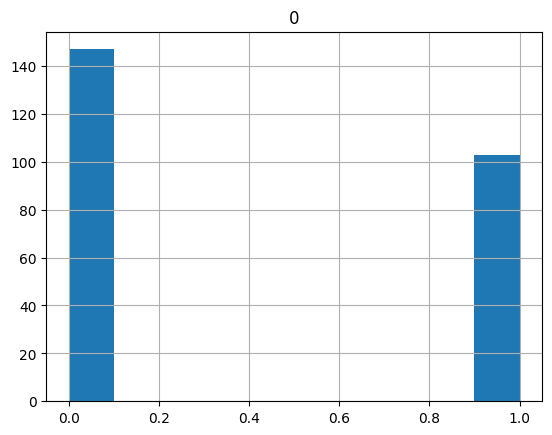

In [49]:
#Histograma, considerando a parte de teste, prevendo o target baseado no limiar de classificação de 50%
# O histograma mostra que o modelo classificou quase 200 instâncias como spam (1) e 1200 instâncias como não spam (0)
pd.DataFrame(y_pred).hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

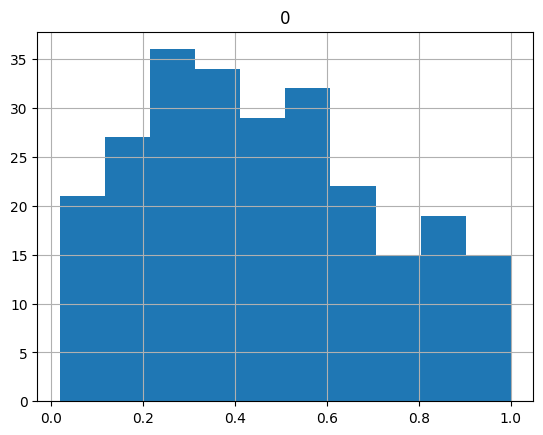

In [50]:
#Histograma, considerando a parte de teste, com a saída das probabilidades da classe positiva (1), ex: é spam
pd.DataFrame(y_proba_1).hist(bins = 10)

In [51]:
#Cálculo de métricas, baseadas no limiar de classificação de 50%.
from sklearn.metrics import accuracy_score, precision_score, recall_score
#Para acurácia, precision e recall, passar sempre y_test que é a verdade (target) anotada na base supervisionada e y_pred que é a saída que o modelo gerou, escorando o espaço de características de teste, produzindo uma saída: 0 se a probabilidade é <=50%, caso contrário 1.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.772
Precision: 0.7961165048543689
Recall: 0.6949152542372882


In [52]:
from sklearn import metrics
# Cálculo da área abaixo da curva ROC, o método roc_auc_score leva os seguintes parâmetros
#(i) y_test -> é a verdade anotada na base supervisionada (target) para os dados de teste
#(i) y_proba1 -> é probabilidade do acerto na classe postiva, extraída pelo modelo ao escorar os espaços de característica de teste
area = metrics.roc_auc_score(y_test,y_proba_1)

In [53]:
area

np.float64(0.8740369799691834)

In [54]:
# Os parâmtros de entrada são os mesmos do método anterior:
#(i) y_test -> é a verdade anotada na base supervisionada (target) para os dados de teste
#(i) y_proba1 -> é probabilidade do acerto na classe postiva, extraída pelo modelo ao escorar os espaços de característica de teste
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_proba_1 )
# Este método metrics.roc_curve retorna três variáveis do tipo vetor:
#(i) (fpr) vetor da métroca false positive rate
#(ii) (tpr) vetor da métrica true positive rate
#(iii) Vetor dos limiares de classificação utilizados para gerar o gráfico

In [55]:
thresholds

array([ inf, 1.  , 0.99, 0.95, 0.93, 0.92, 0.87, 0.84, 0.83, 0.81, 0.79,
       0.78, 0.76, 0.75, 0.74, 0.73, 0.71, 0.7 , 0.69, 0.68, 0.67, 0.66,
       0.63, 0.62, 0.61, 0.6 , 0.58, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51,
       0.5 , 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 ,
       0.39, 0.37, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27,
       0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16,
       0.14, 0.13, 0.11, 0.1 , 0.06, 0.05, 0.02])

In [56]:
tpr

array([0.        , 0.04237288, 0.05932203, 0.08474576, 0.10169492,
       0.12711864, 0.16101695, 0.21186441, 0.22033898, 0.28813559,
       0.29661017, 0.31355932, 0.34745763, 0.34745763, 0.37288136,
       0.38135593, 0.39830508, 0.42372881, 0.44067797, 0.44915254,
       0.46610169, 0.47457627, 0.52542373, 0.53389831, 0.55084746,
       0.57627119, 0.61016949, 0.62711864, 0.65254237, 0.66101695,
       0.66101695, 0.66949153, 0.69491525, 0.71186441, 0.71186441,
       0.72033898, 0.75423729, 0.75423729, 0.76271186, 0.77966102,
       0.78813559, 0.80508475, 0.83898305, 0.8559322 , 0.86440678,
       0.88135593, 0.89830508, 0.91525424, 0.91525424, 0.92372881,
       0.92372881, 0.92372881, 0.93220339, 0.93220339, 0.94915254,
       0.94915254, 0.95762712, 0.95762712, 0.97457627, 0.98305085,
       0.98305085, 0.99152542, 0.99152542, 0.99152542, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [57]:
thresholds

array([ inf, 1.  , 0.99, 0.95, 0.93, 0.92, 0.87, 0.84, 0.83, 0.81, 0.79,
       0.78, 0.76, 0.75, 0.74, 0.73, 0.71, 0.7 , 0.69, 0.68, 0.67, 0.66,
       0.63, 0.62, 0.61, 0.6 , 0.58, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51,
       0.5 , 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 ,
       0.39, 0.37, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27,
       0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16,
       0.14, 0.13, 0.11, 0.1 , 0.06, 0.05, 0.02])

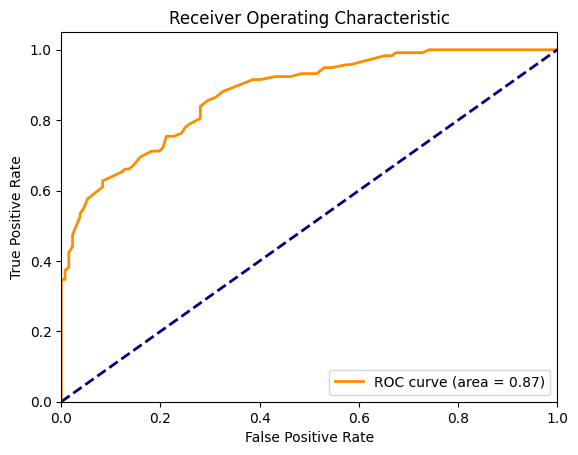

In [58]:
import matplotlib.pyplot as plt

# Como plotar a curva roc com um gráfico

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_1)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.2.2

ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 35.7 MB/s eta 0:00:00
